In [93]:
#지도학습의 회귀

import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

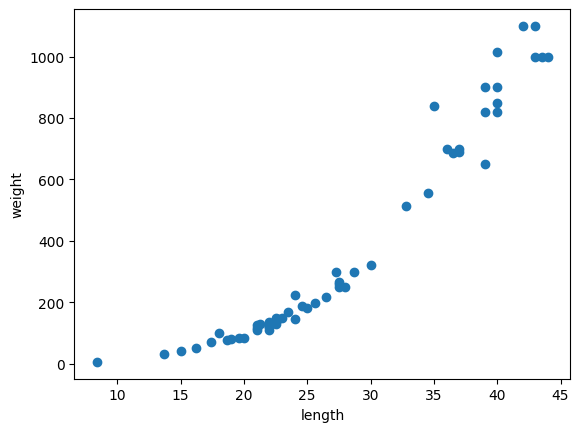

In [94]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [95]:
from sklearn.model_selection import train_test_split

#이 함수는 네 개의 값을 반환한다. 훈련피처, 검증피처, 훈련타겟, 검증타겟
train_input, test_input, train_target, test_target = \
train_test_split(perch_length, perch_weight, random_state=52)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


In [96]:
#결정 계수 R²
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
#k-최근접 이웃 회귀 모델 훈련
#fit 메소드는 학습 데이터를 2차원 배열로 전달받는다.
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [97]:
knr.score(test_input, test_target)

0.9502347636493633

In [98]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

58.97857142857142


In [99]:
#과대적합/과소적합
#훈련점수는 높지만 테스트 점수가 낮으면 과대적합, 그 외엔 과소적합
print(knr.score(train_input, train_target))

0.982190404115935


In [100]:
#이웃의 개수를 3으로 설정
knr.n_neighbors = 3
#모델 재 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9906459111360252


In [101]:
print(knr.score(test_input, test_target))

0.9602139835607404


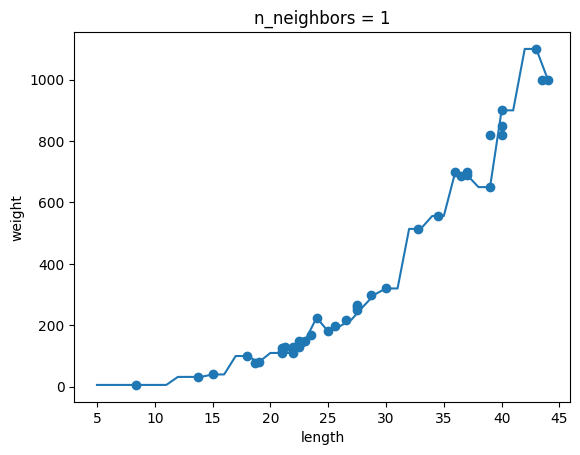

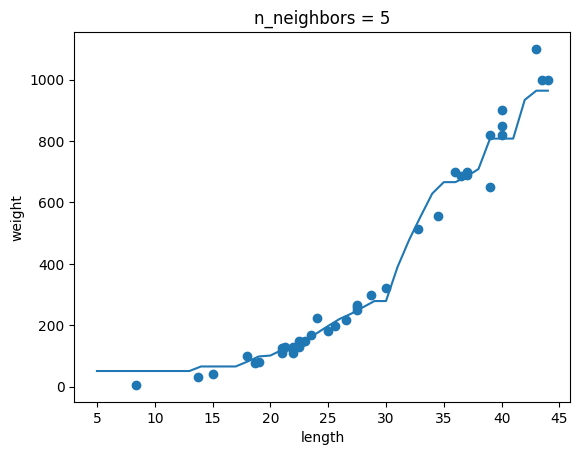

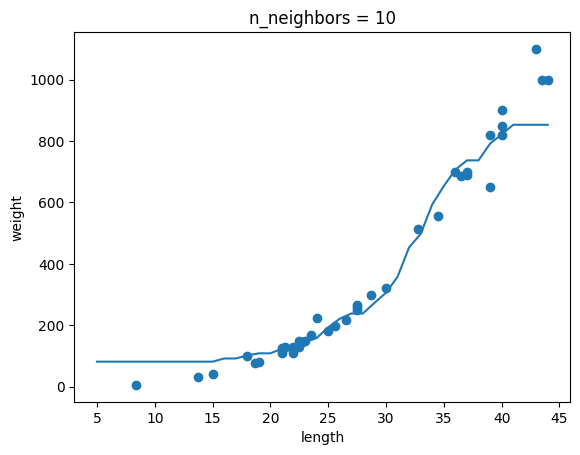

In [102]:
#확인문제
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

In [103]:
print(knr.predict([[50]]))

[853.]


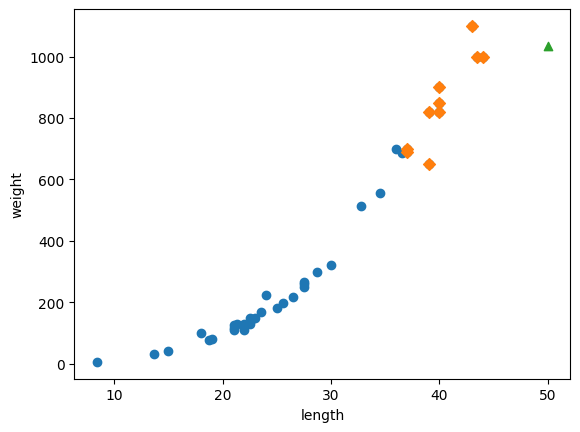

In [104]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [105]:
print(np.mean(train_target[indexes]))

853.0


In [106]:
#값이 아무리 커져도 k-최근접 이웃의 근거하여 값은 근접값을 참고한다.
#k-최근접 이웃의 한계
print(knr.predict([[100]]))

[853.]


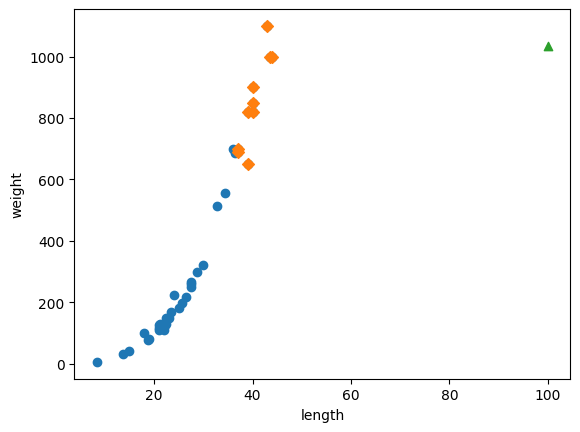

In [107]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [108]:
# 선형 회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

In [109]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1136.04351647]


In [110]:
#직선 형태로 추론하는것으로,
#y = ax+b 일때 coef_ = a(기울기), intercept_ = b(절편)
print(lr.coef_, lr.intercept_)

[34.68959266] -598.436116670737


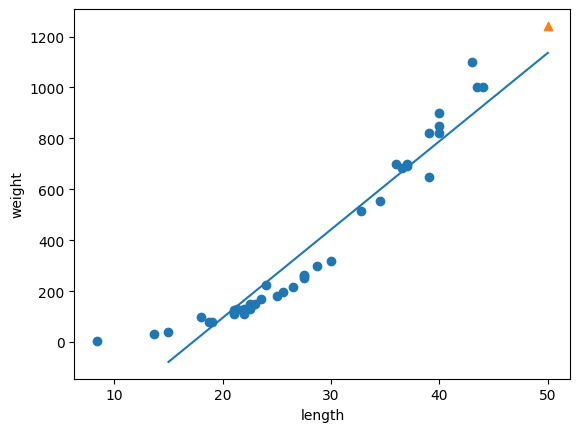

In [111]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [112]:
#훈련모델과 테스트모델의 값이 크게 차이나진 않지만,
#예측값이 낮게 나왔으므로 과소적합으로 '볼 수' 있다.
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9218699539310103
0.8973878650160756


In [113]:
#다항 회귀
#곡선을 그리기 위해 다항 형태로 변환
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [114]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1502.85132846]


In [115]:
# y = ax^2 + bx + c 일때 a = 0.98285903 , b = -21.78000435, c = 134.70396919601825
print(lr.coef_, lr.intercept_)

[  0.98285903 -21.78000435] 134.70396919601825


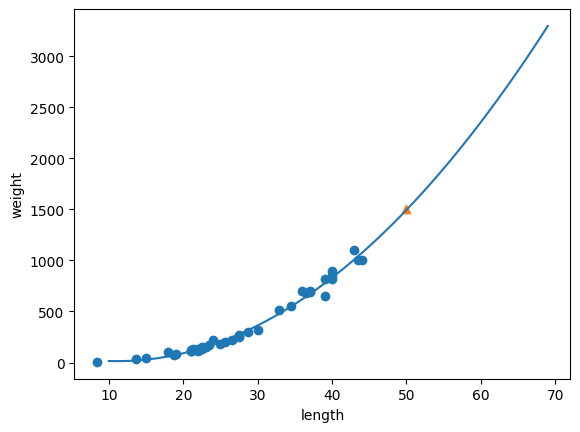

In [116]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(10, 70)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 0.98*point**2 - 21.8*point + 135)
# 50cm 농어 데이터
plt.scatter([50], [1502], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [117]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9861419569902573
0.9380462942726892
